# 連続データの確率的推論

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cvxopt

In [55]:
input_file = 'TimeSeries/data_2D.txt'
indices = [2,3]

In [57]:
input_data_txt = np.loadtxt(input_file, delimiter=',')
print(input_data_txt[:5])
s = str(int(input_data_txt[0,0]))
p = str(int(input_data_txt[0,1]))
o = s + '-' + p
print(f"{o} is {type(o)}")

[[1.900e+03 1.000e+00 9.791e+01 7.328e+01]
 [1.900e+03 2.000e+00 8.680e+01 6.382e+01]
 [1.900e+03 3.000e+00 3.560e+00 5.184e+01]
 [1.900e+03 4.000e+00 7.220e+00 8.213e+01]
 [1.900e+03 5.000e+00 4.678e+01 1.581e+01]]
1900-1 is <class 'str'>


In [58]:
pd.to_datetime(o)

Timestamp('1900-01-01 00:00:00')

In [21]:
# 関数のスプリクト内容が変更されても反映されるようにするおまじない
%load_ext autoreload
%autoreload 2

from functions_py import timeseries

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


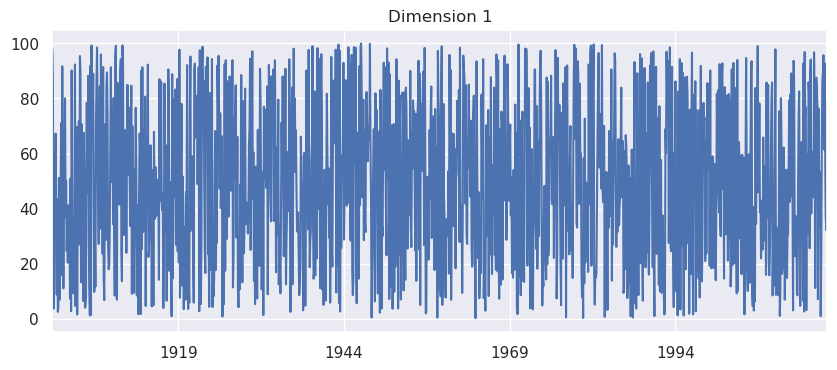

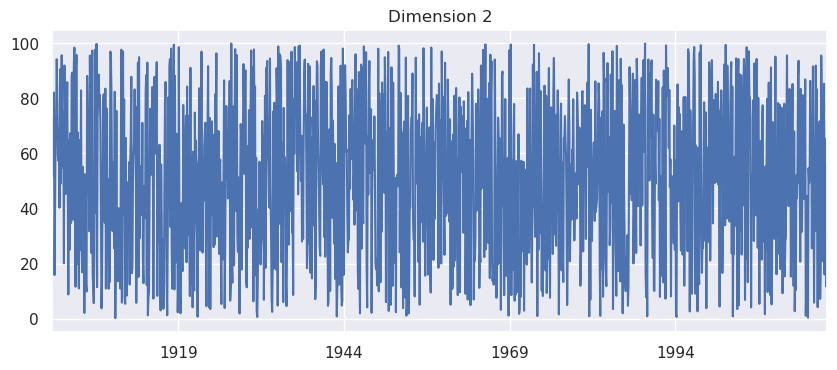

In [24]:
sns.set()
for index in indices:
    times = timeseries.read_data(input_file, index)
    
    plt.figure(figsize=(10,4), dpi=100)
    times.plot()
    plt.title('Dimension ' + str(index -1))
plt.show()

In [45]:
times[:3]

1900-01-31    73.28
1900-02-28    63.82
1900-03-31    51.84
Freq: M, dtype: float64

In [26]:
index = 2
data = timeseries.read_data('TimeSeries/data_2D.txt', index)

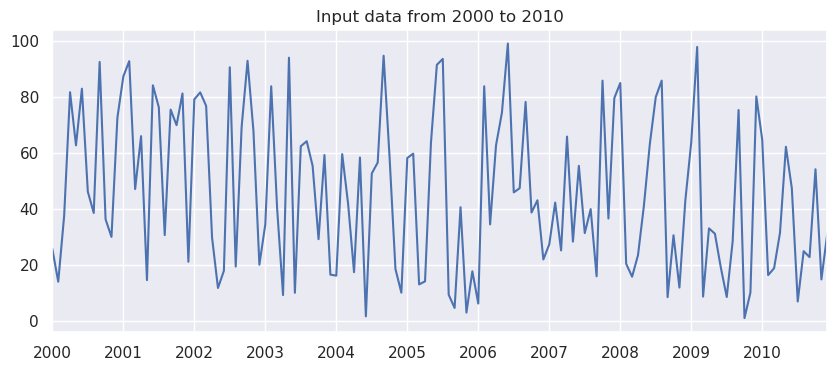

In [30]:
start = '2000'
end = '2010'
plt.figure(figsize=(10,4), dpi=100)
data[start:end].plot()
plt.title('Input data from ' + start +' to ' + end)
plt.show()

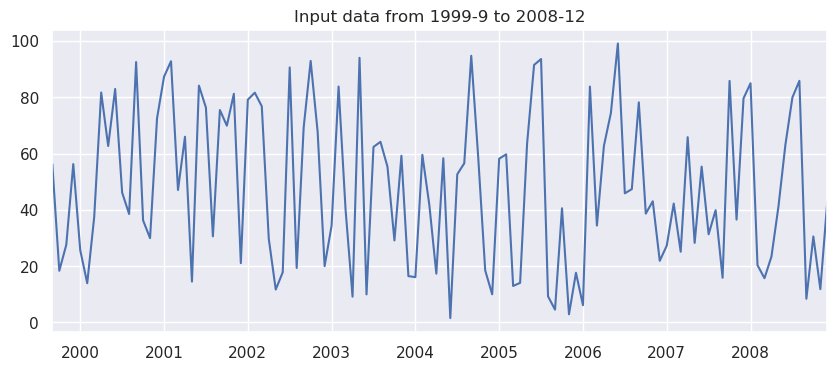

In [31]:
start = '1999-9'
end = '2008-12'
plt.figure(figsize=(10,4), dpi=100)
data[start:end].plot()
plt.title('Input data from ' + start +' to ' + end)
plt.show()

# 時系列データの演算

In [32]:
x1 = timeseries.read_data(input_file, 2)
x2 = timeseries.read_data(input_file, 3)

In [33]:
data = pd.DataFrame({'dim1': x1, 'dim2': x2})

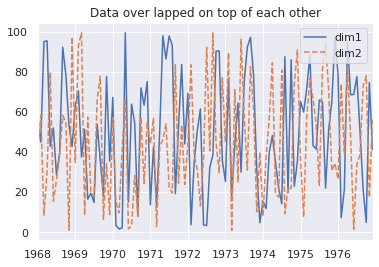

In [36]:
start = '1968'
end = '1976'
data[start:end].plot(style=['-', '--'])
plt.title('Data over lapped on top of each other')
plt.show()

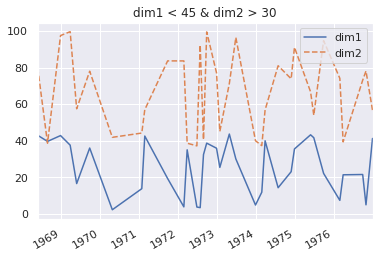

In [37]:
data[(data['dim1'] < 45) & (data['dim2'] > 30)][start:end].plot(style=['-', '--'])
plt.title('dim1 < 45 & dim2 > 30')
plt.show()

# 時系列データから統計量抽出

In [40]:
data.head(3)

,dim1,dim2
1900-01-31,97.91,73.28
1900-02-28,86.80,63.82
1900-03-31,3.56,51.84


In [43]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [38]:
data.describe()

,dim1,dim2
count,1404.000000,1404.000000
mean,49.030541,50.983291
std,28.854214,28.655149
min,0.180000,0.160000
25%,24.597500,25.980000
50%,47.345000,52.330000
75%,73.925000,75.665000
max,99.980000,99.970000


- rolling(window).mean(): 移動平均. windowの移動平均を求めていく．

例えば，rolling(window=23).mean()のとき，data[0:23].mean(),data[1:24].mean(),data[2:25]のように求めていく

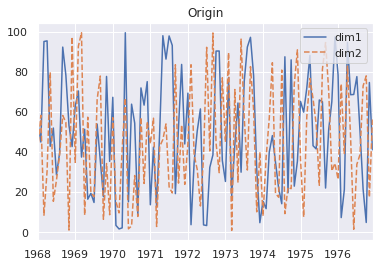

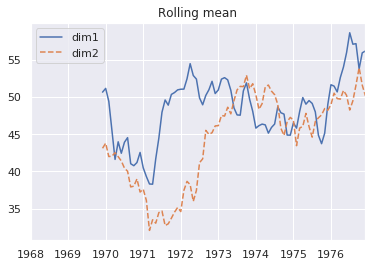

In [62]:
data[start:end].plot(style=['-', '--'])
plt.title('Origin')
plt.show()
data[start:end].rolling(window=24).mean().plot(style=['-', '--'])
plt.title('Rolling mean')
plt.show()

In [63]:
data.corr()

,dim1,dim2
dim1,1.00000,0.00627
dim2,0.00627,1.00000


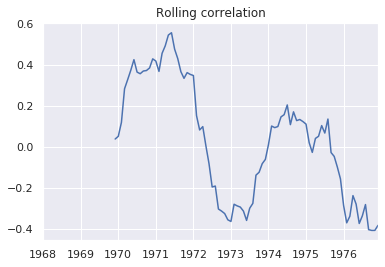

In [68]:
data_corr = data[start:end]
data_corr['dim1'].rolling(window=24).corr(other=data_corr['dim2']).plot()
plt.title('Rolling correlation')
plt.show()

# 隠れマルコフモデル

In [88]:
markov_london = np.array([[0.1, 0.7, 0.2],
                          [0.75, 0.15, 0.1],
                          [0.6, 0.35,0.05]])
X = np.array([1,0,0])

In [89]:
markov_london_before = markov_london.dot(markov_london).dot(markov_london)
print(f"T^3:\n{markov_london_before}")
markov_london = X.dot(markov_london).dot(markov_london).dot(markov_london)
markov_london

T^3:
[[0.30925  0.53025  0.1605  ]
 [0.563625 0.320125 0.11625 ]
 [0.49725  0.375375 0.127375]]


array([0.30925, 0.53025, 0.1605 ])

In [91]:
data2 = np.loadtxt('TimeSeries/data_1D.txt', delimiter=',')
data2[:3]

array([[1.8e+03, 1.0e+00, 3.0e-02],
       [1.8e+03, 2.0e+00, 2.0e-02],
       [1.8e+03, 3.0e+00, 1.9e-01]])

In [92]:
X = np.column_stack([data2[:, 2]])

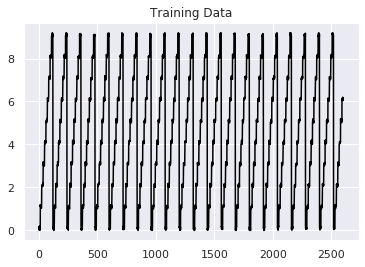

In [95]:
plt.plot(np.arange(X.shape[0]), X[:, 0], c = 'black')
plt.title('Training Data')
plt.show()

## CRFを用いたアルファベット列の識別
CRF:条件付き確率場(conditional random field)は構造化されたデータを分析するのによく使われる確率的モデル．

**連続データを分割してラベル漬けするのに使われる．"識別モデル"**

- サンプルデータ：OCR(光学的文字認識)の特徴ラベルと正解ラベルが格納されたもの
- 条件付き確率だからベイズっぽい？

# 株式市場分析

- 隠れマルコフモデルを使う

In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn.hmm import GaussianHMM
import pandas_datareader.data as pdd

In [5]:
QUANDL_API_KEY = '**********'

start = datetime.date(1970, 9, 4)
end = datetime.date(2016, 5, 17)
stock_quotes = pdd.DataReader('WIKI/INTC', 'quandl', start, end, api_key = QUANDL_API_KEY)

- closing_quotes: 終値
- volumes: 出来高

In [12]:
closing_quotes = np.array(stock_quotes['Close'])
volumes = np.array(stock_quotes['Volume'][1:])
print(closing_quotes[:3])
print(volumes[:3])

[29.98 30.39 29.91]
[21826072. 19999591. 20826694.]


In [9]:
diff_percentages = 100.0 * np.diff(closing_quotes) / closing_quotes[:-1]
training_data = np.column_stack([diff_percentages, volumes])
training_data[:4,:]

array([[ 1.36757839e+00,  2.18260720e+07],
       [-1.57946693e+00,  1.99995910e+07],
       [-5.01504514e-01,  2.08266940e+07],
       [ 1.00806452e+00,  1.57542330e+07]])

In [13]:
hmm = GaussianHMM(n_components=7, covariance_type='diag', n_iter=1000)
hmm.fit(training_data)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=7, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [18]:
num_samples = 300
samples, _ =  hmm.sample(num_samples)
samples[:3]

array([[3.34325014e+00, 2.48008738e+07],
       [4.89222634e-01, 1.81685330e+07],
       [6.45885393e-01, 8.48669986e+06]])

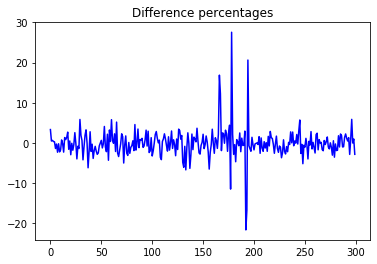

In [19]:
plt.figure()
plt.title('Difference percentages')
plt.plot(np.arange(num_samples), samples[:, 0], c = 'b')
plt.show();

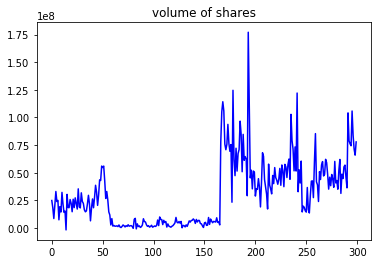

In [20]:
plt.figure()
plt.title('volume of shares')
plt.plot(np.arange(num_samples), samples[:, 1], c = 'b')
plt.show();